# Housing Price Index Prediction 

The Key Supply and Demand Factors utilized are:
#### 1) Demand:-
    -> GDP
    -> Employment-ratio
    -> 30-Years Fixed Mortgage rates
    -> Homeownership rates
#### 2) Supply:-
    -> Monthly Supply of Houses
    -> New One Family Houses Sold
    -> New Homes for Sale
    -> Homeowner Vaccancy Rate

All the Datasets have been imported in quaterly frequency for last two decades from FRED Economic Data.

In [1]:
import pandas as pd

### Demand Data

In [2]:
gdp = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Demand\GDP.csv', index_col='DATE', parse_dates=True)
gdp.head()

,GDP
DATE,
2000-10-01,10439.025
2001-01-01,10472.879
2001-04-01,10597.822
2001-07-01,10596.294
2001-10-01,10660.294


In [3]:
emp_ratio = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Demand\Employment Ratio.csv', index_col='DATE', parse_dates=True)
emp_ratio.head()

,EMRATIO
DATE,
2000-10-01,64.300000
2001-01-01,64.333333
2001-04-01,63.833333
2001-07-01,63.466667
2001-10-01,63.033333


In [4]:
ownership_rate = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Demand\Homeownership Rate.csv', index_col='DATE', parse_dates=True)
ownership_rate.head()

,RHORUSQ156N
DATE,
2000-10-01,67.5
2001-01-01,67.5
2001-04-01,67.7
2001-07-01,68.1
2001-10-01,68.0


In [5]:
mortgage_rate = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Demand\Mortgage Rate.csv', index_col='DATE', parse_dates=True)
mortgage_rate.head()

,MORTGAGE30US
DATE,
2000-10-01,7.620769
2001-01-01,7.006923
2001-04-01,7.130000
2001-07-01,6.963846
2001-10-01,6.770769


In [6]:
Demand = pd.concat([gdp,emp_ratio,ownership_rate,mortgage_rate], axis=1)
Demand.head()

,GDP,EMRATIO,RHORUSQ156N,MORTGAGE30US
DATE,,,,
2000-10-01,10439.025,64.300000,67.5,7.620769
2001-01-01,10472.879,64.333333,67.5,7.006923
2001-04-01,10597.822,63.833333,67.7,7.130000
2001-07-01,10596.294,63.466667,68.1,6.963846
2001-10-01,10660.294,63.033333,68.0,6.770769


### Supply Data

In [7]:
vaccancy_rate = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Supply\Homeowner Vaccancy Rate.csv', index_col='DATE', parse_dates=True)
vaccancy_rate.head()

,RHVRUSQ156N
DATE,
2000-10-01,1.6
2001-01-01,1.5
2001-04-01,1.8
2001-07-01,1.9
2001-10-01,1.8


In [8]:
monthly_supply = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Supply\Monthly Supply.csv', index_col='DATE', parse_dates=True)
monthly_supply.head()

,MSACSR
DATE,
2000-10-01,3.933333
2001-01-01,3.766667
2001-04-01,4.033333
2001-07-01,4.333333
2001-10-01,4.066667


In [9]:
homes_for_sale = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Supply\New Homes for Sale.csv', index_col='DATE', parse_dates=True)
homes_for_sale.head()

,HNFSEPUSSA
DATE,
2000-10-01,301.333333
2001-01-01,294.666667
2001-04-01,296.666667
2001-07-01,307.666667
2001-10-01,308.000000


In [10]:
homes_sold = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Supply\New Homes Sold.csv', index_col='DATE', parse_dates=True)
homes_sold.head()

,HSN1F
DATE,
2000-10-01,932.000000
2001-01-01,946.000000
2001-04-01,892.000000
2001-07-01,866.333333
2001-10-01,924.666667


In [11]:
Supply = pd.concat([vaccancy_rate,monthly_supply,homes_for_sale,homes_sold], axis=1)
Supply.head()

,RHVRUSQ156N,MSACSR,HNFSEPUSSA,HSN1F
DATE,,,,
2000-10-01,1.6,3.933333,301.333333,932.000000
2001-01-01,1.5,3.766667,294.666667,946.000000
2001-04-01,1.8,4.033333,296.666667,892.000000
2001-07-01,1.9,4.333333,307.666667,866.333333
2001-10-01,1.8,4.066667,308.000000,924.666667


In [12]:
house_price_index = pd.read_csv(r'C:\Users\Paritosh\Desktop\Home.LLC\Datasets\Home Price Index.csv', index_col='DATE', parse_dates=True)
house_price_index.head()

,CSUSHPISA
DATE,
2000-10-01,108.272667
2001-01-01,110.484000
2001-04-01,112.202333
2001-07-01,114.156333
2001-10-01,115.871333


### Merging Data

In [13]:
Data = pd.concat([Supply,Demand,house_price_index], axis=1)
Data.head()

,RHVRUSQ156N,MSACSR,HNFSEPUSSA,HSN1F,GDP,EMRATIO,RHORUSQ156N,MORTGAGE30US,CSUSHPISA
DATE,,,,,,,,,
2000-10-01,1.6,3.933333,301.333333,932.000000,10439.025,64.300000,67.5,7.620769,108.272667
2001-01-01,1.5,3.766667,294.666667,946.000000,10472.879,64.333333,67.5,7.006923,110.484000
2001-04-01,1.8,4.033333,296.666667,892.000000,10597.822,63.833333,67.7,7.130000,112.202333
2001-07-01,1.9,4.333333,307.666667,866.333333,10596.294,63.466667,68.1,6.963846,114.156333
2001-10-01,1.8,4.066667,308.000000,924.666667,10660.294,63.033333,68.0,6.770769,115.871333


In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2000-10-01 to 2020-10-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RHVRUSQ156N   81 non-null     float64
 1   MSACSR        81 non-null     float64
 2   HNFSEPUSSA    81 non-null     float64
 3   HSN1F         81 non-null     float64
 4   GDP           81 non-null     float64
 5   EMRATIO       81 non-null     float64
 6   RHORUSQ156N   81 non-null     float64
 7   MORTGAGE30US  81 non-null     float64
 8   CSUSHPISA     81 non-null     float64
dtypes: float64(9)
memory usage: 6.3 KB


#### Renaming columns

In [15]:
mapper = {'RHORUSQ156N':'Ownership Rate (%)','MSACSR':'Monthly Supply','HSN1F':'New One Family Homes Sold (Thousands)','HNFSEPUSSA':'New Homes for Sale (Thousands)','GDP':'GDP (Billions of Dollars)','EMRATIO':'Employment (%)','MORTGAGE30US':'Mortgage Rate (%)','CSUSHPISA':'House Price Index','RHVRUSQ156N':'Vaccancy Rate(%)'}
Data.rename(columns=mapper, inplace=True)

In [16]:
Data.head()

,Vaccancy Rate(%),Monthly Supply,New Homes for Sale (Thousands),New One Family Homes Sold (Thousands),GDP (Billions of Dollars),Employment (%),Ownership Rate (%),Mortgage Rate (%),House Price Index
DATE,,,,,,,,,
2000-10-01,1.6,3.933333,301.333333,932.000000,10439.025,64.300000,67.5,7.620769,108.272667
2001-01-01,1.5,3.766667,294.666667,946.000000,10472.879,64.333333,67.5,7.006923,110.484000
2001-04-01,1.8,4.033333,296.666667,892.000000,10597.822,63.833333,67.7,7.130000,112.202333
2001-07-01,1.9,4.333333,307.666667,866.333333,10596.294,63.466667,68.1,6.963846,114.156333
2001-10-01,1.8,4.066667,308.000000,924.666667,10660.294,63.033333,68.0,6.770769,115.871333


In [17]:
Data.round(3)

,Vaccancy Rate(%),Monthly Supply,New Homes for Sale (Thousands),New One Family Homes Sold (Thousands),GDP (Billions of Dollars),Employment (%),Ownership Rate (%),Mortgage Rate (%),House Price Index
DATE,,,,,,,,,
2000-10-01,1.6,3.933,301.333,932.000,10439.025,64.300,67.5,7.621,108.273
2001-01-01,1.5,3.767,294.667,946.000,10472.879,64.333,67.5,7.007,110.484
2001-04-01,1.8,4.033,296.667,892.000,10597.822,63.833,67.7,7.130,112.202
2001-07-01,1.9,4.333,307.667,866.333,10596.294,63.467,68.1,6.964,114.156
2001-10-01,1.8,4.067,308.000,924.667,10660.294,63.033,68.0,6.771,115.871
...,...,...,...,...,...,...,...,...,...
2019-10-01,1.4,5.467,321.667,711.000,21747.394,60.967,65.1,3.700,212.534
2020-01-01,1.1,5.667,327.333,700.667,21561.139,60.700,65.3,3.522,215.629
2020-04-01,0.9,5.467,311.333,702.667,19520.114,52.900,67.9,3.239,217.939


In [18]:
Dataframe = Data.round(3)

In [19]:
Dataframe.head()

,Vaccancy Rate(%),Monthly Supply,New Homes for Sale (Thousands),New One Family Homes Sold (Thousands),GDP (Billions of Dollars),Employment (%),Ownership Rate (%),Mortgage Rate (%),House Price Index
DATE,,,,,,,,,
2000-10-01,1.6,3.933,301.333,932.000,10439.025,64.300,67.5,7.621,108.273
2001-01-01,1.5,3.767,294.667,946.000,10472.879,64.333,67.5,7.007,110.484
2001-04-01,1.8,4.033,296.667,892.000,10597.822,63.833,67.7,7.130,112.202
2001-07-01,1.9,4.333,307.667,866.333,10596.294,63.467,68.1,6.964,114.156
2001-10-01,1.8,4.067,308.000,924.667,10660.294,63.033,68.0,6.771,115.871


In [20]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2000-10-01 to 2020-10-01
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Vaccancy Rate(%)                       81 non-null     float64
 1   Monthly Supply                         81 non-null     float64
 2   New Homes for Sale (Thousands)         81 non-null     float64
 3   New One Family Homes Sold (Thousands)  81 non-null     float64
 4   GDP (Billions of Dollars)              81 non-null     float64
 5   Employment (%)                         81 non-null     float64
 6   Ownership Rate (%)                     81 non-null     float64
 7   Mortgage Rate (%)                      81 non-null     float64
 8   House Price Index                      81 non-null     float64
dtypes: float64(9)
memory usage: 6.3 KB


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

### Relation between different features at a glance

In [23]:
Dataframe.corr()

,Vaccancy Rate(%),Monthly Supply,New Homes for Sale (Thousands),New One Family Homes Sold (Thousands),GDP (Billions of Dollars),Employment (%),Ownership Rate (%),Mortgage Rate (%),House Price Index
Vaccancy Rate(%),1.000000,0.743442,0.177757,-0.356210,-0.375599,0.136705,0.324850,0.345766,-0.336154
Monthly Supply,0.743442,1.000000,0.216910,-0.501126,0.086557,-0.042427,0.086958,0.099563,0.135679
New Homes for Sale (Thousands),0.177757,0.216910,1.000000,0.692430,-0.327378,0.716681,0.653145,0.652714,0.245725
New One Family Homes Sold (Thousands),-0.356210,-0.501126,0.692430,1.000000,-0.466078,0.667215,0.619006,0.562535,-0.004973
GDP (Billions of Dollars),-0.375599,0.086557,-0.327378,-0.466078,1.000000,-0.613788,-0.793024,-0.837999,0.816926
Employment (%),0.136705,-0.042427,0.716681,0.667215,-0.613788,1.000000,0.540985,0.845600,-0.276046
Ownership Rate (%),0.324850,0.086958,0.653145,0.619006,-0.793024,0.540985,1.000000,0.779044,-0.380323
Mortgage Rate (%),0.345766,0.099563,0.652714,0.562535,-0.837999,0.845600,0.779044,1.000000,-0.511086
House Price Index,-0.336154,0.135679,0.245725,-0.004973,0.816926,-0.276046,-0.380323,-0.511086,1.000000


Here, we can observe that GDP and Mortgage rates are the two factors that influence the HPI the most. Apart from these, Homeowner vaccancy rate, Homeownership rate and employment are the facors which have marginal impact on HPI.

<AxesSubplot:>

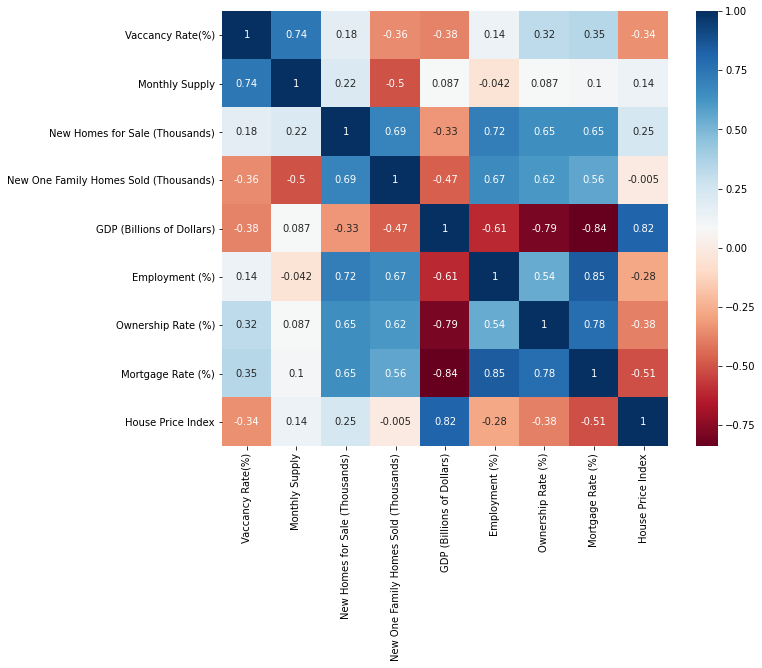

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(Dataframe.corr(), cmap='RdBu', annot=True)

### Relation between GDP and HPI

<AxesSubplot:xlabel='GDP (Billions of Dollars)', ylabel='House Price Index'>

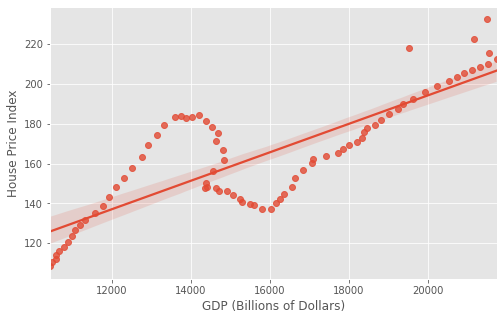

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))

sns.regplot(x='GDP (Billions of Dollars)', y='House Price Index', data=Dataframe)

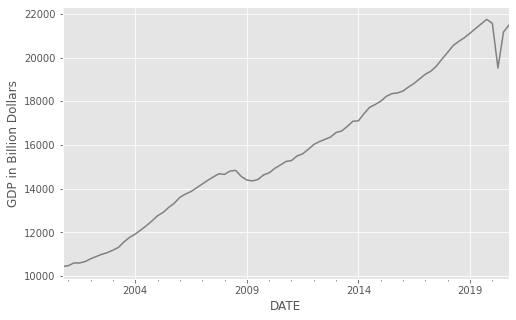

In [26]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5))

gdp = Dataframe['GDP (Billions of Dollars)'].copy()
ax = gdp.plot(color='gray')
ax.set(ylabel='GDP in Billion Dollars')
plt.show()

It can be observed that there is a strong relationship between GDP and Housing Prices (Graph 1). With an increase in GDP, there is an increase in per capita income which, in return also increases the lifestlye of the citizens. Thus, more people can afford to buy a house, leading to increase in the demand.

Here, with the increase in the Gross-Domestic Product over these years, it an be seen that there was an increment in the Housing prices. Though the HPI started decrementing after the 2008 recession, it again went up with consisitent increase in GDP.

### Relation between 30-Year Fixed Mortgage Rates and HPI

<AxesSubplot:xlabel='Mortgage Rate (%)', ylabel='House Price Index'>

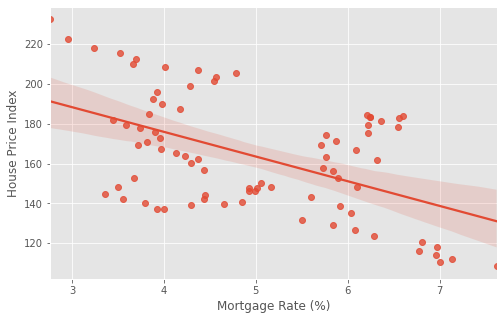

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))

sns.regplot(x='Mortgage Rate (%)', y='House Price Index', data=Dataframe)

It is evident that as the mortgage rates increase, people tend to give it a second thought before investing in home.

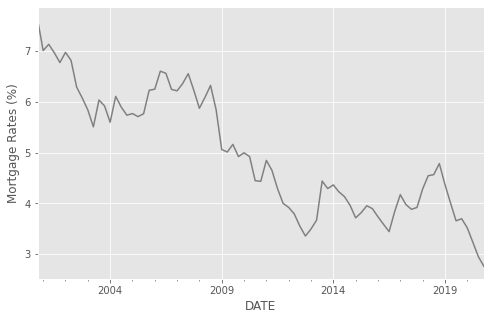

In [28]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5))

Mortgage = Dataframe['Mortgage Rate (%)'].copy()
ax = Mortgage.plot(color='gray')
ax.set(ylabel='Mortgage Rates (%)')
plt.show()

With Mortgage rates consistently falling, it has definitely raised the demand for housing prices over the two decades. With decrease in the rates, the affordability increases as more people can now think of purchasing a home as they will have to pay less rates compared to previous years.

### Realtionship between Homeowner Vaccancy Rates and HPI

<AxesSubplot:xlabel='Vaccancy Rate(%)', ylabel='House Price Index'>

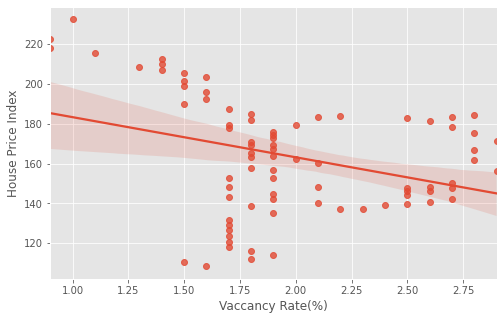

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))

sns.regplot(x='Vaccancy Rate(%)', y='House Price Index', data=Dataframe)

The homeowner vacancy rate is defined as the proportion of homeowner inventory that is vacant and for sale.

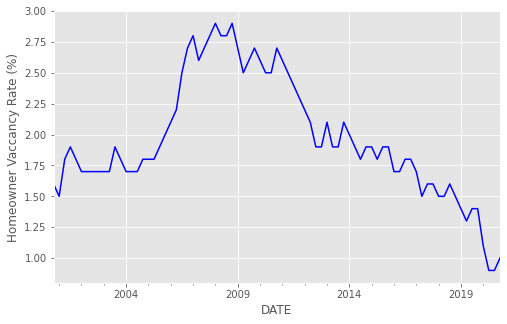

In [30]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5))

vaccancy = Dataframe['Vaccancy Rate(%)'].copy()
ax = vaccancy.plot(color='blue')
ax.set(ylabel='Homeowner Vaccancy Rate (%)')
plt.show()

Here, there is a minor relationship as compared to other two factors but, it can reduce the housing prices as more the number of houses are available on sale, the prices are bound to decrease as the supply outrights the demand in this case.

Since 2008, the vaccancy rate has been conisitently decreasing (plot 2) thus, curbing the supply and increasing the rates.

### Relationship between Month's supply and HPI

<AxesSubplot:xlabel='Monthly Supply', ylabel='House Price Index'>

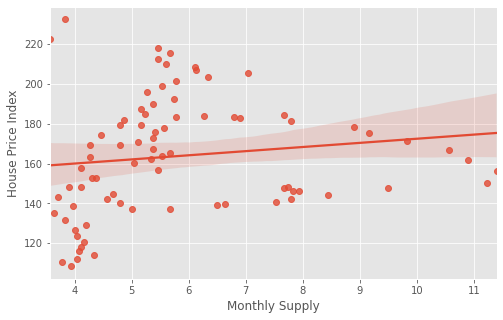

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))

sns.regplot(x='Monthly Supply', y='House Price Index', data=Dataframe)

Months’ supply refers to the number of months it would take for the current inventory of homes on the market to sell given the current sales pace. Historically, six months of supply is associated with moderate price appreciation.

### Relation between Homeownership Rate and  HPI

<AxesSubplot:xlabel='Ownership Rate (%)', ylabel='House Price Index'>

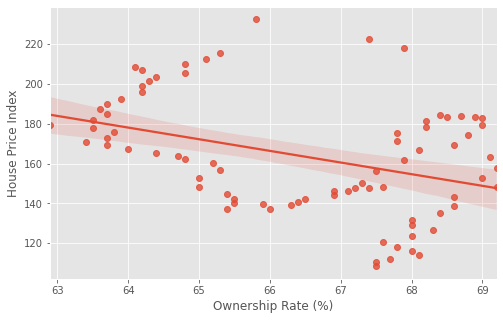

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))

sns.regplot(x='Ownership Rate (%)', y='House Price Index', data=Dataframe)

The homeownership rate is the percentage of U.S. homes that are owner-occupied. An increase in ownership rate brings down the supply rates, thus giving housing price a surge.

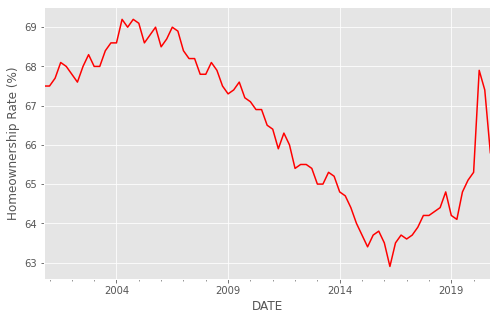

In [33]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8,5))

ownership = Dataframe['Ownership Rate (%)'].copy()
ax = ownership.plot(color='red')
ax.set(ylabel='Homeownership Rate (%)')
plt.show()

Historically speaking, the homeownership rate has risen above the 50-year low it reached during the second quarter of 2016 when it clocked in at 62.9 percent. Still, it's several percentage points away from its pre-recession peak of 69.2 percent. 

These were the some of the key factors, which drive the housing prices.

### Model

In [34]:
Dataframe.describe()

,Vaccancy Rate(%),Monthly Supply,New Homes for Sale (Thousands),New One Family Homes Sold (Thousands),GDP (Billions of Dollars),Employment (%),Ownership Rate (%),Mortgage Rate (%),House Price Index
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.967901,5.823901,310.193432,692.786012,15744.029988,60.621370,66.439506,4.977778,163.824222
std,0.486011,1.905639,115.322591,302.606273,3333.521439,2.122259,1.894049,1.201978,29.184834
min,0.900000,3.567000,143.000000,292.333000,10439.025000,52.900000,62.900000,2.761000,108.273000
25%,1.700000,4.300000,215.000000,441.000000,13332.316000,58.800000,64.800000,3.922000,142.285000
50%,1.900000,5.367000,301.333000,607.333000,15240.843000,60.433000,66.900000,4.785000,163.481000
75%,2.400000,6.633000,365.667000,946.000000,18378.803000,62.533000,68.000000,6.075000,183.323000
max,2.900000,11.400000,565.667000,1296.000000,21747.394000,64.333000,69.200000,7.621000,232.546000


In [35]:
import sys
!{sys.executable} -m pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Splitting features and labels

In [36]:
X,y = Dataframe.iloc[:,0:8],Dataframe.iloc[:,8]

In [37]:
X.head()

,Vaccancy Rate(%),Monthly Supply,New Homes for Sale (Thousands),New One Family Homes Sold (Thousands),GDP (Billions of Dollars),Employment (%),Ownership Rate (%),Mortgage Rate (%)
DATE,,,,,,,,
2000-10-01,1.6,3.933,301.333,932.000,10439.025,64.300,67.5,7.621
2001-01-01,1.5,3.767,294.667,946.000,10472.879,64.333,67.5,7.007
2001-04-01,1.8,4.033,296.667,892.000,10597.822,63.833,67.7,7.130
2001-07-01,1.9,4.333,307.667,866.333,10596.294,63.467,68.1,6.964
2001-10-01,1.8,4.067,308.000,924.667,10660.294,63.033,68.0,6.771


In [38]:
y.head()

DATE
2000-10-01    108.273
2001-01-01    110.484
2001-04-01    112.202
2001-07-01    114.156
2001-10-01    115.871
Name: House Price Index, dtype: float64

In [39]:
y.to_frame()

,House Price Index
DATE,
2000-10-01,108.273
2001-01-01,110.484
2001-04-01,112.202
2001-07-01,114.156
2001-10-01,115.871
...,...
2019-10-01,212.534
2020-01-01,215.629
2020-04-01,217.939


### Generating training and test data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Machine Learning Model

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Input = [('Scaler',MinMaxScaler()),('Scale',StandardScaler()),('model',LinearRegression())]

pipe = Pipeline(Input)
pipe.fit(x_train, y_train)
y_hat = pipe.predict(x_test)

print('Accuracy of the model:',round(pipe.score(x_test, y_test), 2))
rmse = mean_squared_error(y_test, y_hat, squared=False)
print('Root mean squared error:',round(rmse, 2))

Accuracy of the model: 0.99
Root mean squared error: 2.18


The model yields an accuracy of 99% which is indeed a good sign.

In [42]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_hat)
mae

1.6107539731032279

### Feature Importance

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(x_train, y_train)
fs.transform(x_train)
print(fs.scores_)

[10.8517074   0.69902457  3.75078105  0.10032804 98.84037712  4.54879466
  5.991708   19.99832619]


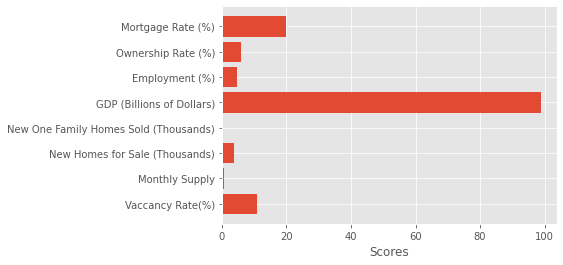

In [44]:
scores = fs.scores_

values = ['Vaccancy Rate(%)','Monthly Supply','New Homes for Sale (Thousands)','New One Family Homes Sold (Thousands)','GDP (Billions of Dollars)','Employment (%)','Ownership Rate (%)','Mortgage Rate (%)']
position = (0,1,2,3,4,5,6,7)

plt.barh([i for i in range(len(scores))], scores)
plt.xlabel('Scores')
plt.yticks(position, values)
plt.show()

Here, it can be seen that GDP, Mortgage Rates and Vaccancy Rates are the features with considerably higher amount of influence.